In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob 

In [2]:
def parse_name(filename):
    """
    Parse the filename of the file to extract the parameters.
    """
    # robust parameter parser: <name0>=<value0>_<name1>=<value1>...
    params = []
    curr = ''
    in_value = False
    for c in filename:
        if c == '=' and not in_value:
            curr += c
            in_value = True
        elif c == '_' and in_value:
            params.append(curr)
            curr = ''
            in_value = False
        else:
            curr += c
    if curr:
        params.append(curr)
    parsed_params = {}
    for param in params:
        name, value = param.split('=', 1)
        parsed_params[name] = value
        
    return parsed_params


def add_model_params(df, params):
    """
    Add the model parameters to the dataframe.
    """
    df['experiment'] = params.get('exp', '').replace('-', ' ')
    df['test_set'] = params.get('musdb', '')
    df['data_train'] = params.get('wav', '')
    df['repitch'] = params.get('repitch', 0.5)
    df['resample'] = params.get('resample', False)
    df['epochs'] = params.get('epochs', '')
    # set 'loss' column to either "SISDR" or "PITSISDR" if present in parameters, else ''
    if "SISDR" in params:
        df['loss'] = "SISDR"
    elif "PITSISDR" in params:
        df['loss'] = "PITSISDR"
    else:
        df['loss'] = ""
    return df

In [3]:
dfs_train = []
# for each json file in logs folder
files = sorted(glob.glob('logs/*.json'))
for filename in files:
    df = pd.read_json(filename)
    param_str = filename.split('/')[-1].replace('.json', '')
    parameters = parse_name(param_str)
    df = add_model_params(df, parameters)
    dfs_train.append(df)
    
dfs_train[0]

,train,valid,best,duration,model_size,true_model_size,compressed_model_size,experiment,test_set,data_train,repitch,resample,epochs,loss
0,12.655689,10.659958,10.659958,326.502499,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
1,8.798197,9.880945,9.880945,290.270977,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
2,8.053748,9.526105,9.526105,165.574704,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
3,7.669205,9.391258,9.391258,164.301826,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
4,7.316957,9.395396,9.391258,164.004966,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.929922,0.056502,0.056502,166.989461,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
116,0.975201,-0.100284,-0.100284,164.852545,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
117,0.967175,0.076236,-0.100284,165.566670,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR
118,0.930455,-0.019072,-0.100284,162.745248,0,0,0,Experiment A No Aug,noaug,mad,0.0,False,120,SISDR


In [4]:
def plot_trainig(df):
    # plot loss train valid vs index 
    plt.figure(figsize=(10, 5))
    plt.plot(df['train'], label='Train Loss')
    plt.plot(df['valid'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{df["experiment"].iloc[0]}')
    plt.legend()
    plt.grid()
    plt.xlim(0, int(df['epochs'].iloc[0]))
    plt.show()

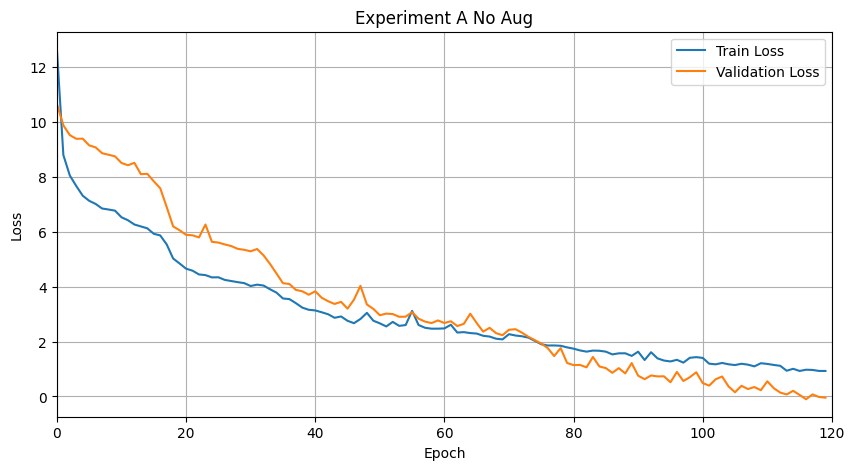

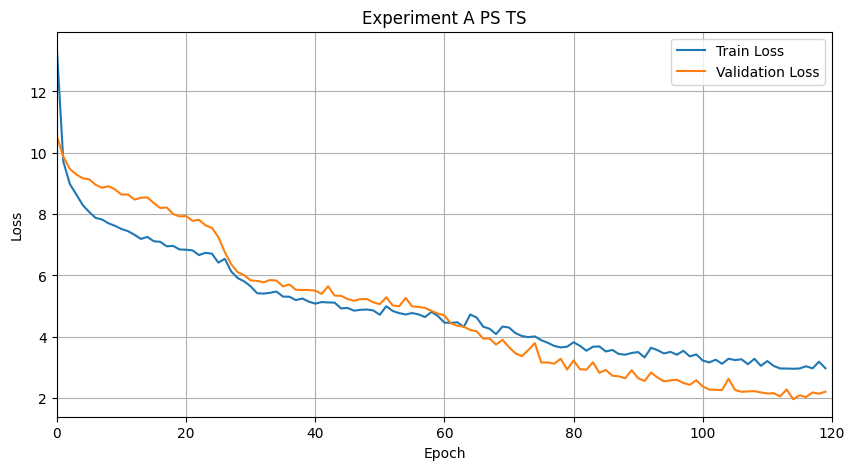

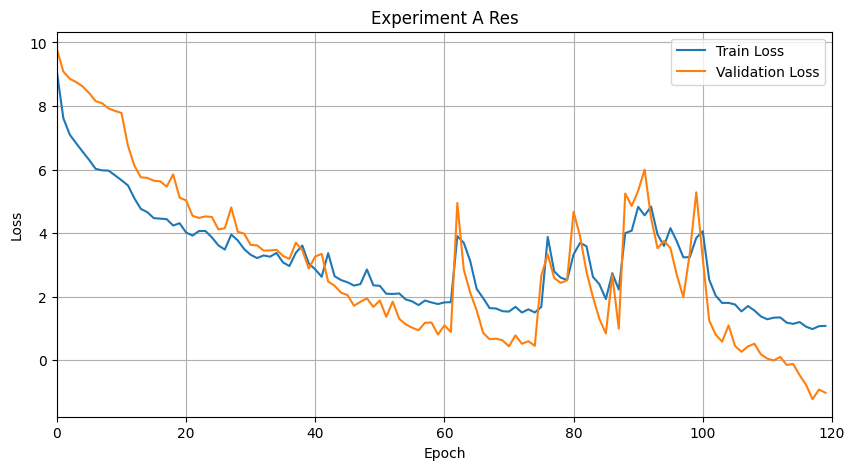

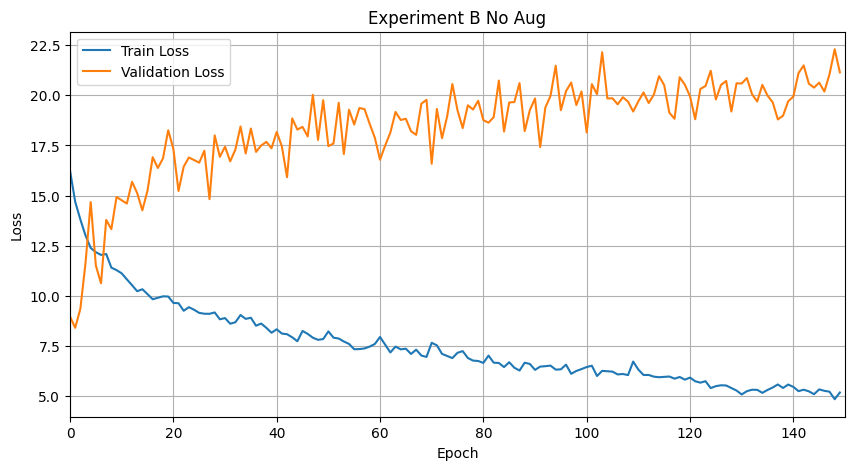

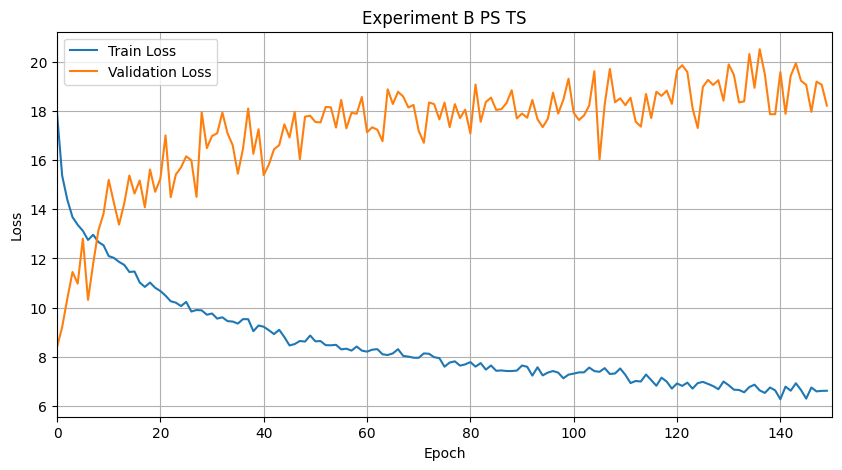

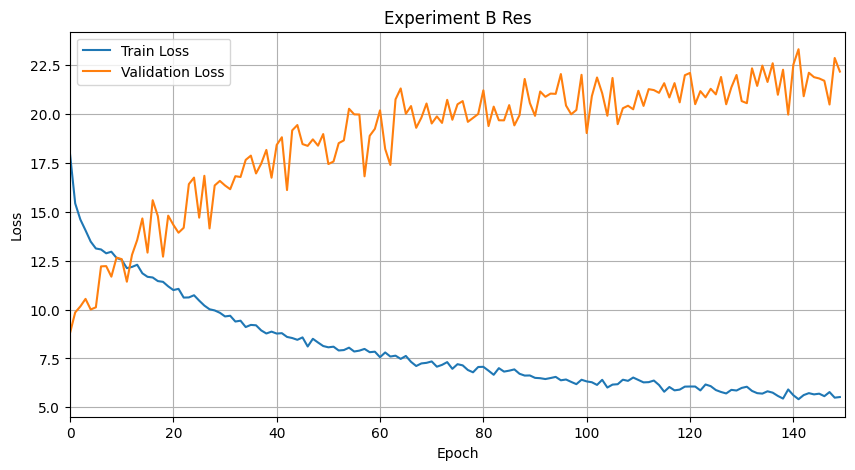

In [5]:
for df in dfs_train:
    plot_trainig(df)

In [6]:
dfs_valid = []
# for each json file in logs folder
files = sorted(glob.glob('evals/**/results/metrics.csv'))
for filename in files:
    df = pd.read_csv(filename)
    param_str = filename.split('/')[-3]
    parameters = parse_name(param_str)
    df = add_model_params(df, parameters)
    dfs_valid.append(df)
    
dfs_valid[0]

# concat all dataframes
dfs_valid = pd.concat(dfs_valid, ignore_index=True)


dfs_valid_A = dfs_valid[dfs_valid['loss'] == 'SISDR']
dfs_valid_A.loc[:, 'experiment'] = dfs_valid_A['experiment'].str.replace('Experiment A', '')

dfs_valid_B = dfs_valid[dfs_valid['loss'] == 'PITSISDR']
dfs_valid_B.loc[:, 'experiment'] = dfs_valid_B['experiment'].str.replace('Experiment B', '')

dfs_valid_A

,input_si_sdr,input_sdr,input_sir,input_sar,input_stoi,input_pesq,si_sdr,sdr,sir,sar,stoi,pesq,id,experiment,test_set,data_train,repitch,resample,epochs,loss
0,-23.146973,-28.007252,-25.778245,3.022342,0.705893,1.814965,-33.007938,-7.918352,2.499108,-1.978306,0.509305,1.923737,0,No Aug,noaug,mad,0.0,False,120,SISDR
1,-26.433362,-28.193604,-23.600214,-0.842767,0.724544,2.884409,-35.009849,-9.146524,-0.710547,-3.161544,0.536257,1.871452,1,No Aug,noaug,mad,0.0,False,120,SISDR
2,-38.918790,-47.112979,-45.301051,6.307802,0.554195,2.126046,-54.669171,-8.408332,2.108256,-0.444856,0.359308,2.004828,2,No Aug,noaug,mad,0.0,False,120,SISDR
3,-23.146973,-28.007252,-25.778245,3.022342,0.705893,1.814965,-30.015077,-10.624317,-3.636993,-2.171133,0.531789,1.789561,0,PS TS,noaug,mad,0.5,False,120,SISDR
4,-26.433362,-28.193604,-23.600214,-0.842767,0.724544,2.884409,-33.714539,-9.586116,-4.169599,-1.052025,0.509024,1.920454,1,PS TS,noaug,mad,0.5,False,120,SISDR
5,-38.918790,-47.112979,-45.301051,6.307802,0.554195,2.126046,-58.892241,-11.130834,-2.818238,-1.981300,0.363300,2.118020,2,PS TS,noaug,mad,0.5,False,120,SISDR
6,-23.146973,-28.007252,-25.778245,3.022342,0.705893,1.814965,-32.559100,-7.038414,3.061924,-0.860494,0.466677,1.873946,0,Res,noaug,mad,0.5,True,120,SISDR
7,-26.433362,-28.193604,-23.600214,-0.842767,0.724544,2.884409,-31.897155,-9.882997,-0.827366,-3.180652,0.501625,1.759527,1,Res,noaug,mad,0.5,True,120,SISDR
8,-38.918790,-47.112979,-45.301051,6.307802,0.554195,2.126046,-53.481319,-8.867098,4.961504,-0.849399,0.387508,2.369021,2,Res,noaug,mad,0.5,True,120,SISDR


In [7]:
# average si_sdr, sdr, sir, sar, stoi, pesq for each experiment
dfs_valid_A_agg = dfs_valid_A.groupby(['experiment']).agg({
    'si_sdr': ['mean', 'std'],
    'stoi': ['mean', 'std'],
    'pesq': ['mean', 'std']
}).reset_index()

dfs_valid_A_agg

experiment     si_sdr                 stoi                pesq          
                   mean        std      mean       std      mean       std
0     No Aug -40.895653  11.970140  0.468290  0.095339  1.933339  0.067205
1      PS TS -40.873952  15.713547  0.468038  0.091417  1.942678  0.165353
2        Res -39.312525  12.274999  0.451937  0.058469  2.000831  0.323953

In [8]:
# average si_sdr, sdr, sir, sar, stoi, pesq for each experiment
dfs_valid_B_agg = dfs_valid_B.groupby(['experiment']).agg({
    'si_sdr': ['mean', 'std'],
    'stoi': ['mean', 'std'],
    'pesq': ['mean', 'std']
}).reset_index()

dfs_valid_B_agg

experiment    si_sdr                 stoi                pesq          
                  mean        std      mean       std      mean       std
0     No Aug  3.533440  10.305220  0.893335  0.101895  2.569411  0.535074
1      PS TS  3.171615   9.401619  0.885704  0.094357  2.464024  0.499366
2        Res  4.571066   9.920759  0.895384  0.105468  2.603960  0.480517

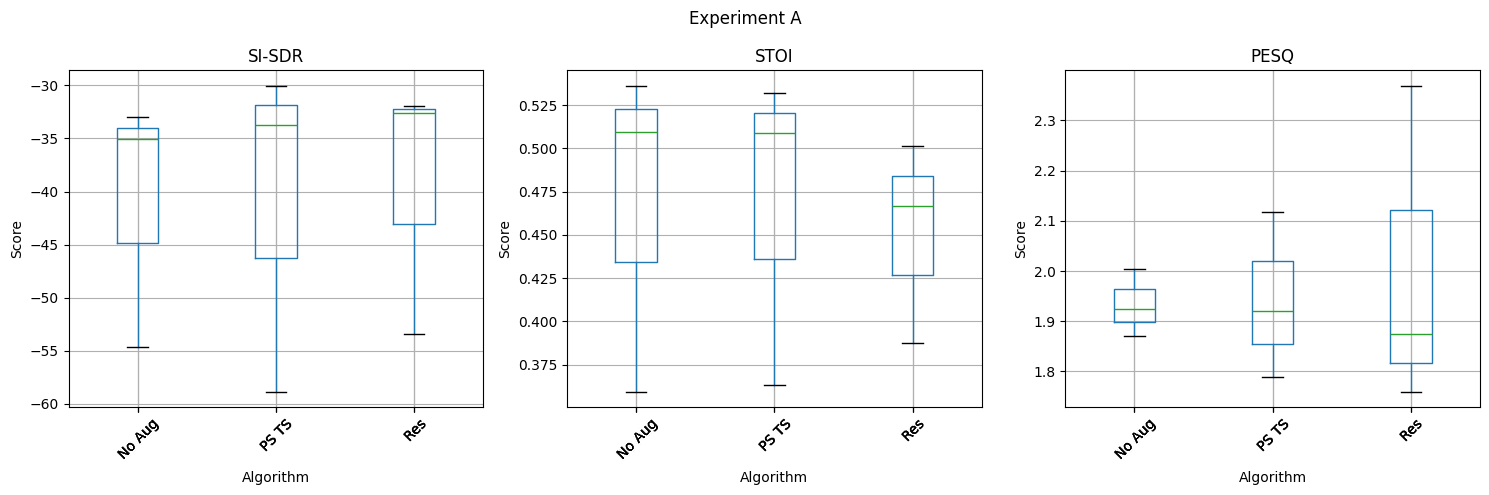

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

# Boxplot for si_sdr
dfs_valid_A.boxplot(by='experiment', column='si_sdr', rot=45, ax=axes[0])
axes[0].set_title('SI-SDR')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Score')

# Boxplot for stoi
dfs_valid_A.boxplot(by='experiment', column='stoi', rot=45, ax=axes[1])
axes[1].set_title('STOI')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('Score')

# Boxplot for pesq
dfs_valid_A.boxplot(by='experiment', column='pesq', rot=45, ax=axes[2])
axes[2].set_title('PESQ')
axes[2].set_xlabel('Algorithm')
axes[2].set_ylabel('Score')

plt.suptitle('Experiment A')

plt.tight_layout()
plt.show()

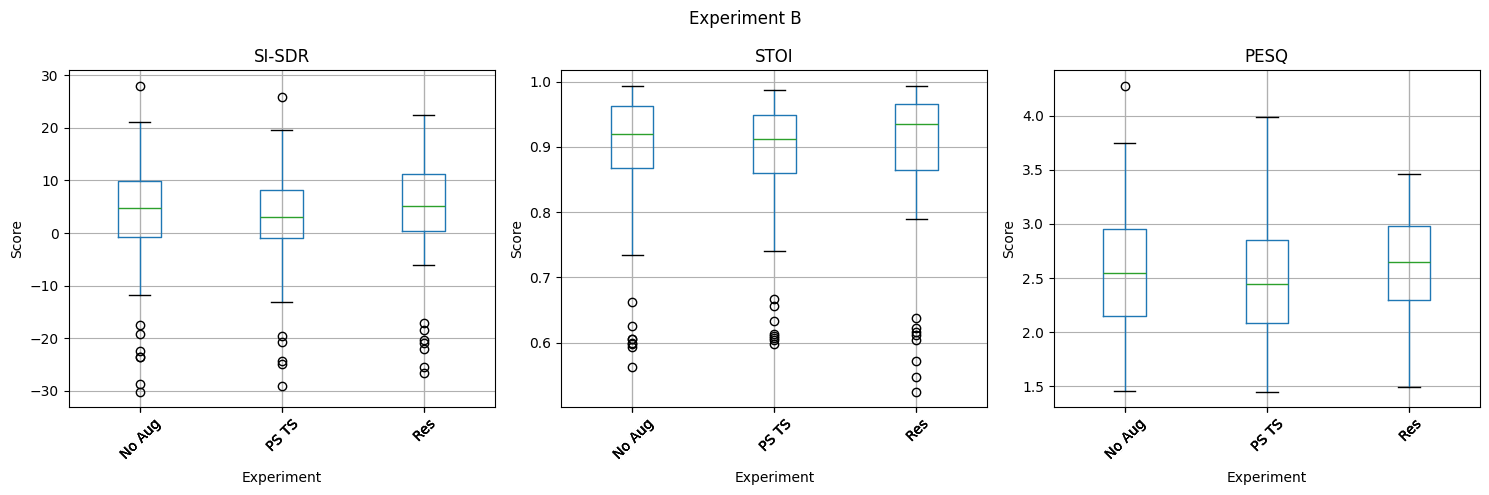

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

# Boxplot for si_sdr
dfs_valid_B.boxplot(by='experiment', column='si_sdr', rot=45, ax=axes[0])
axes[0].set_title('SI-SDR')
axes[0].set_xlabel('Experiment')
axes[0].set_ylabel('Score')

# Boxplot for stoi
dfs_valid_B.boxplot(by='experiment', column='stoi', rot=45, ax=axes[1])
axes[1].set_title('STOI')
axes[1].set_xlabel('Experiment')
axes[1].set_ylabel('Score')

# Boxplot for pesq
dfs_valid_B.boxplot(by='experiment', column='pesq', rot=45, ax=axes[2])
axes[2].set_title('PESQ')
axes[2].set_xlabel('Experiment')
axes[2].set_ylabel('Score')

plt.suptitle('Experiment B')
plt.tight_layout()
plt.show()